<a href="https://colab.research.google.com/github/BurovNV/MyRepo/blob/main/Clust_Metric_ARI_NIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Принимают значения, близкие к 0, при случайном назначении кластеров, и значение 1, когда полученные  результаты кластеризации полностью  совпадают с фактическими (обратите внимание, скорректированный  коэффициент Рэнда может принимать значения от -1 до 1). Как и для корреляции главное - абсолютное значение, а не знак!

In [ ]:
# метрика для оценки кластеризации при условии что изветны истинные метки
# это лишь проверка насколько верно отнесены точки к РАЗНЫМ кластерам
from sklearn.metrics.cluster import adjusted_rand_score as ARI
from sklearn.metrics.cluster import normalized_mutual_info_score as NIF

In [ ]:
# импорт
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
%matplotlib inline

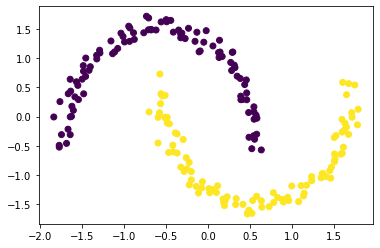

In [ ]:
# данные
x, y = datasets.make_moons(n_samples=200,
                           noise=0.05,
                           random_state=42)
scaler = StandardScaler()
x_std = scaler.fit_transform(x)
plt.scatter(x_std[:, 0], x_std[:, 1], c=y);

In [ ]:
# список алгоритмов
algs = [KMeans(n_clusters=2),                   # 2 кластера
        AgglomerativeClustering(n_clusters=2),  # 2 кластера
        DBSCAN()]                               # все по умолчанию

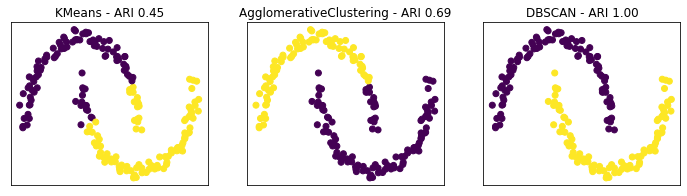

In [ ]:
# обучение в печать результатов в цикле
fig, axs = plt.subplots(1, 3,                      # 1 ряд 3 столбца         
                        figsize=(12, 3),           # размер фигуры
                        subplot_kw={'xticks':(), 
                                    'yticks':()})

for ax, alg in zip(axs, algs):
  # обучение алгоритма из списка
  cluster = alg.fit_predict(x_std)
  # печать результата
  ax.scatter(x_std[:, 0], x_std[:, 1], c=cluster)
  ax.set_title(f'{alg.__class__.__name__} - ARI {ARI(y, cluster):.2f}')

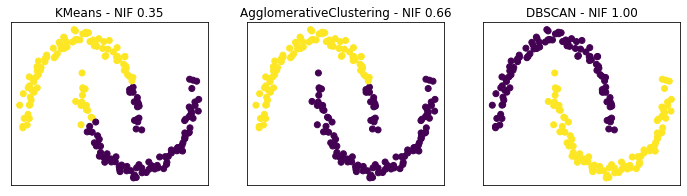

In [ ]:
# тоже самое для NIF - немного отличий
fig, axs = plt.subplots(1, 3,                      # 1 ряд 3 столбца         
                        figsize=(12, 3),           # размер фигуры
                        subplot_kw={'xticks':(), 
                                    'yticks':()})

for ax, alg in zip(axs, algs):
  # обучение алгоритма из списка
  cluster = alg.fit_predict(x_std)
  # печать результата
  ax.scatter(x_std[:, 0], x_std[:, 1], c=cluster)
  ax.set_title(f'{alg.__class__.__name__} - NIF {NIF(y, cluster):.2f}')